### Analysis of MTA Subway by Rosania Pinto ###


MTA Subway Customer Metrics 2015-2024

Question 3: Is there a difference in service time between off-peak and peak service periods? What influence does the number of passengers have with train punctuality?

There is no difference in service time between offpeak and peak service. From the graphs below, the average customer journey time for offpeak and peak service was evenly split for both. Peak service is slight more than 3.0 compared to offpeak service in comparing with number of passengers. Besides that, nothing influences the service time between offpeak and peak service.

According to Pearson's correlation coefficient for Number of Passengers and Customer Journey Time, there is no correlation. Customer Journey Time was -0.31 which is closer to -1 than 0. Hence, it's a very weak negative correlation. It looks that there's no influence on the number of passengers and train punctuality.


In [110]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
MTA_1 = pd.read_csv('data/MTA_Subway_Customer_Metrics__2015-2019.csv')
MTA_2 = pd.read_csv('data/MTA_Subway_Customer_Metrics_2020-2024.csv')

In [112]:
merged_mta = pd.concat([MTA_1, MTA_2])

In [113]:
merged_mta.head()

,month,division,line,period,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc,customer journey time performance
0,2015-01-01,A DIVISION,1,peak,5170116.8,1.371438,0.825562,7090492.655,4268251.636,580364.0,0.112254,0.887746
1,2015-01-01,A DIVISION,1,offpeak,5442987.9,0.913304,0.667314,4971100.611,3632181.629,488584.7,0.089764,0.910236
2,2015-01-01,A DIVISION,2,offpeak,4647297.0,1.084853,1.258279,5041633.115,5847597.552,812798.4,0.174897,0.825103
3,2015-01-01,A DIVISION,2,peak,4719248.8,1.099684,1.419205,5189680.783,6697579.942,839705.4,0.177932,0.822068
4,2015-01-01,A DIVISION,3,offpeak,3602657.1,0.686007,0.856340,2471447.105,3085097.627,368404.9,0.102259,0.897741


In [114]:
merged_mta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4904 entries, 0 to 2855
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   month                              4904 non-null   object 
 1   division                           4904 non-null   object 
 2   line                               4904 non-null   object 
 3   period                             4904 non-null   object 
 4   num_passengers                     4904 non-null   float64
 5   additional platform time           4904 non-null   float64
 6   additional train time              4904 non-null   float64
 7   total_apt                          4904 non-null   float64
 8   total_att                          4904 non-null   float64
 9   over_five_mins                     4904 non-null   float64
 10  over_five_mins_perc                4904 non-null   float64
 11  customer journey time performance  4904 non-null   float64
dt

In [115]:
#counting Period rows in dataset 
merged_mta["period"].str.contains('peak').value_counts()

period
True    4904
Name: count, dtype: int64

In [116]:
#counting Period for Peak and Offpeak 
merged_mta["period"].str.contains('offpeak', na=False).value_counts()

period
False    2452
True     2452
Name: count, dtype: int64

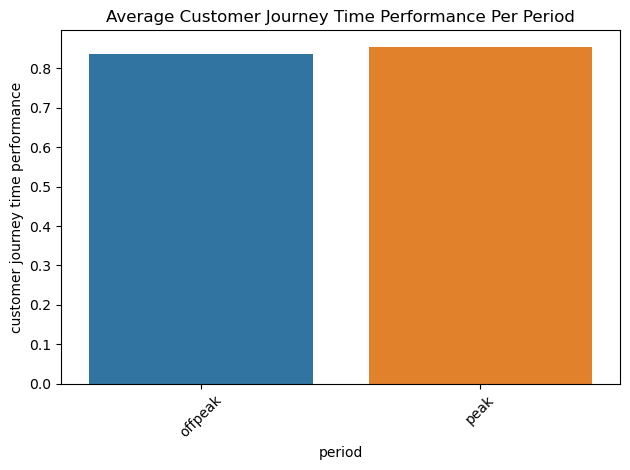

In [117]:
#Graph of Customer Journey Time and Period
avg_per_period = merged_mta.groupby("period", observed=True)["customer journey time performance"].mean().reset_index()

sns.barplot(
    data=avg_per_period,
    x="period",
    y="customer journey time performance",
    hue="period",           # assign hue
    palette="tab10",        # or any other palette
    legend=False            # hide legend since it's redundant
)

plt.title("Average Customer Journey Time Performance Per Period")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


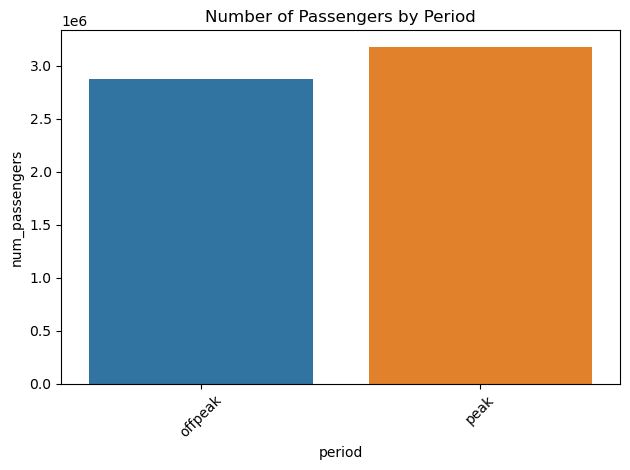

In [129]:
#Graph of Number of Passengers and Period
avg_per_period = merged_mta.groupby("period", observed=True)["num_passengers"].mean().reset_index()

sns.barplot(
    data=avg_per_period,
    x="period",
    y="num_passengers",
    hue="period",           # assign hue
    palette="tab10",        # or any other palette
    legend=False            # hide legend since it's redundant
)

plt.title("Number of Passengers by Period")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


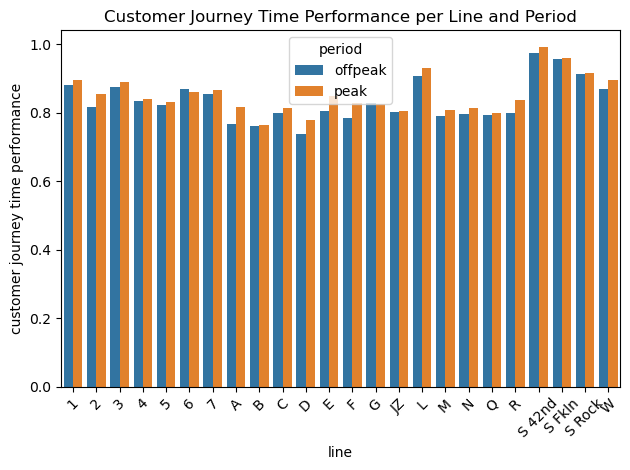

In [118]:
##Graph of Customer Journey Time and Period by Subway Line
avg_per_line_period = merged_mta.groupby(["line", "period"], observed=True)["customer journey time performance"].mean().reset_index()

sns.barplot(data=avg_per_line_period, x="line", y="customer journey time performance", hue="period")
plt.title("Customer Journey Time Performance per Line and Period")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


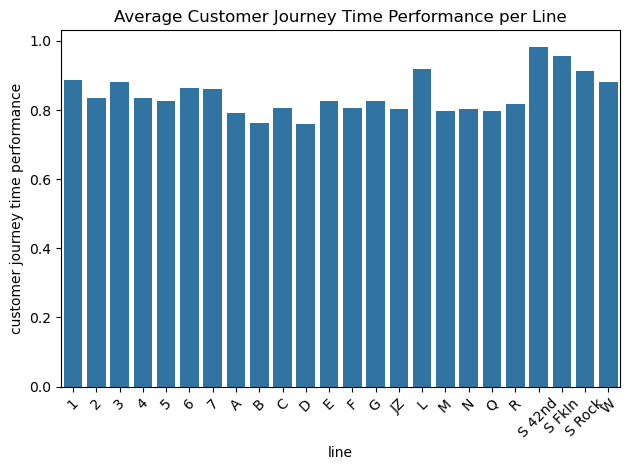

In [119]:
##Graph of Customer Journey Time and Subway Line
avg_per_line = merged_mta.groupby("line", observed=True)["customer journey time performance"].mean().reset_index()

sns.barplot(data=avg_per_line, x="line", y="customer journey time performance")
plt.title("Average Customer Journey Time Performance per Line")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


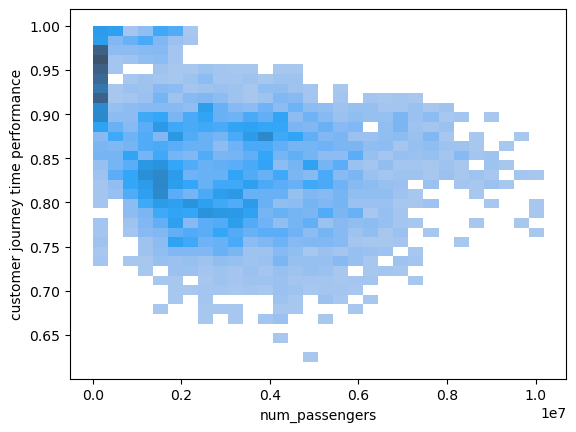

In [120]:
#Histogram of Number of Passengersand Customer Journey
sns.histplot(merged_mta, x="num_passengers", y="customer journey time performance")
plt.show()

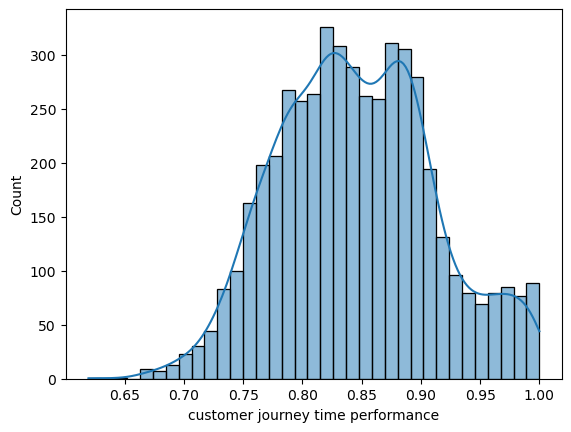

In [121]:
sns.histplot(merged_mta, x="customer journey time performance", kde=True)
plt.show()

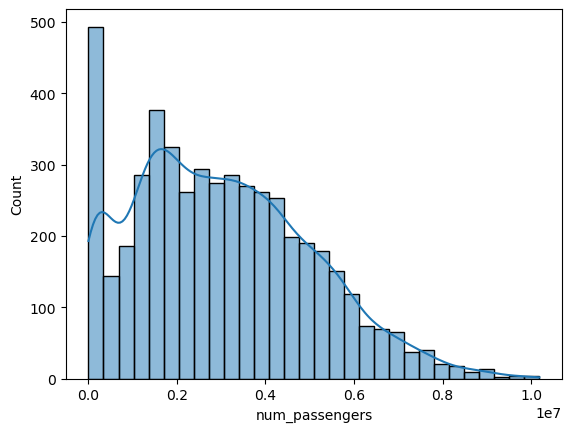

In [122]:
sns.histplot(merged_mta, x="num_passengers", kde=True)
plt.show()

In [123]:
#Pearson's correlation coefficient bewteen number of passengers and customer journey time
merged_mta[["num_passengers", "customer journey time performance"]].corr()

,num_passengers,customer journey time performance
num_passengers,1.000000,-0.319832
customer journey time performance,-0.319832,1.000000


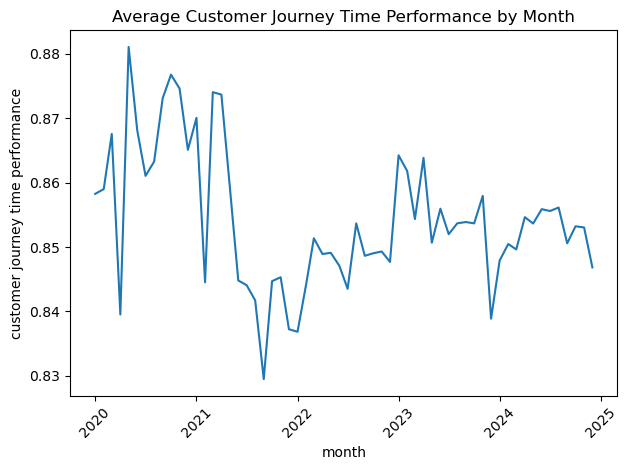

In [127]:
# Graph of Customer Journey by Month
# Convert 'month' to datetime 
merged_mta["month"] = pd.to_datetime(MTA["month"])

# Group by month
monthly_avg = MTA.groupby("month", observed=True)["customer journey time performance"].mean().reset_index()

sns.lineplot(data=monthly_avg, x="month", y="customer journey time performance")
plt.title("Average Customer Journey Time Performance by Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

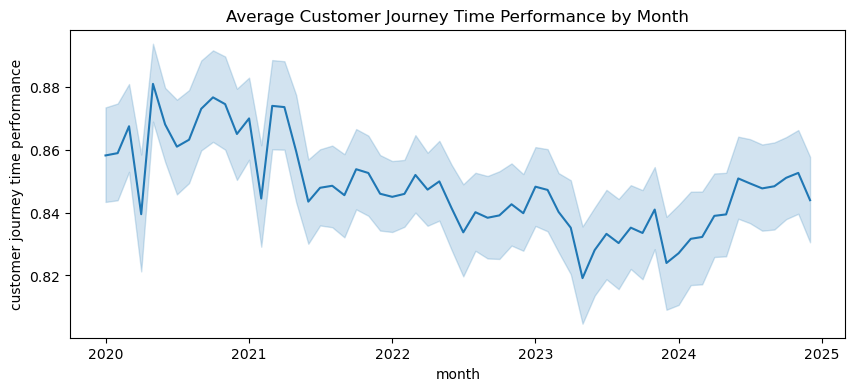

In [133]:
plt.figure(figsize=(10, 4))
m = merged_mta.groupby('month').mean(numeric_only=True).reset_index()

sns.lineplot(data=merged_mta, x="month", y="customer journey time performance")
plt.title("Average Customer Journey Time Performance by Month")
plt.show()

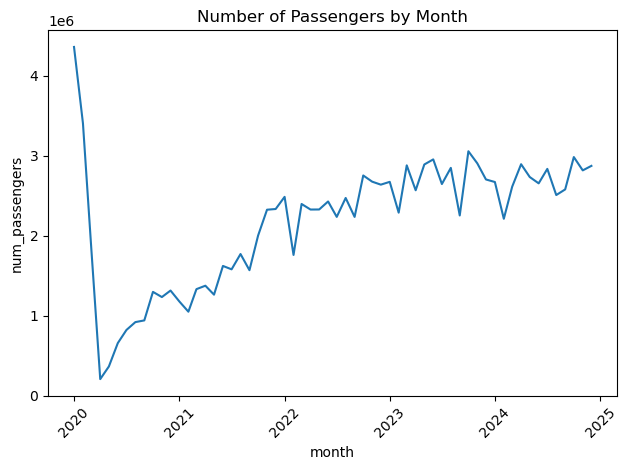

In [126]:
# Graph of Number of Passengers by Month
# Convert 'month' to datetime 
merged_mta["month"] = pd.to_datetime(MTA["month"])

# Group by month
monthly_avg = MTA.groupby("month", observed=True)["num_passengers"].mean().reset_index()

sns.lineplot(data=monthly_avg, x="month", y="num_passengers")
plt.title("Number of Passengers by Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

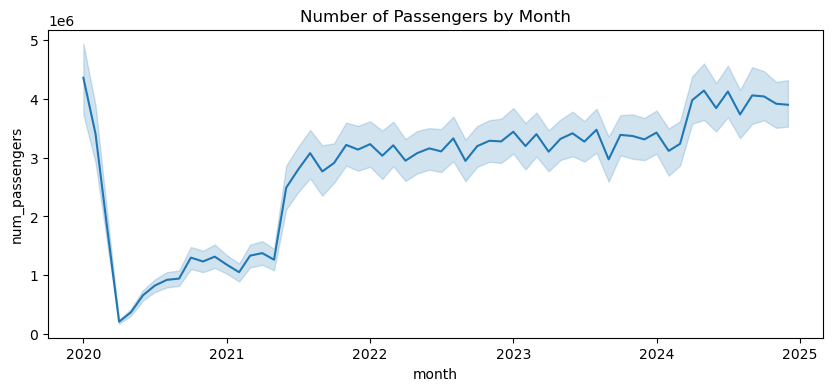

In [134]:
plt.figure(figsize=(10, 4))
n = merged_mta.groupby('month').mean(numeric_only=True).reset_index()

sns.lineplot(data=merged_mta, x="month", y="num_passengers")
plt.title("Number of Passengers by Month")
plt.show()